# Intorduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data.

## Get the data

The images we are working with are from Food101 dataset. 

However, we've modified it to only use two classes (pizza and steak) using the image data modification notebook. 

> **Note**: We start with a smaleer dataset so that we can experiment quickly.

In [9]:
import zipfile

! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-02-05 14:58:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4009:823::201b, 2404:6800:4009:827::201b, 2404:6800:4009:821::201b, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4009:823::201b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: 'pizza_steak.zip.2'

pizza_steak.zip.2   100%[===================>] 104.47M  15.8MB/s    in 8.2s    

2024-02-05 14:58:57 (12.8 MB/s) - 'pizza_steak.zip.2' saved [109540975/109540975]



# Inspect the data

A very crucial step at the beginning of any machine learning project is becoming one with the publish_display_data

In Computer vision, it generally means visualising your data.

In [10]:
!ls pizza_steak

test  train


In [11]:
! ls pizza_steak/train

pizza steak


In [12]:
! ls pizza_steak/train/pizza

1008104.jpg 1638227.jpg 2235981.jpg 2774899.jpg 3464027.jpg 576236.jpg
1008144.jpg 1646974.jpg 2236914.jpg 2775763.jpg 3464858.jpg 5764.jpg
1008844.jpg 1649108.jpg 2241448.jpg 2778214.jpg 3473991.jpg 579691.jpg
1008941.jpg 1649276.jpg 2247711.jpg 277963.jpg  3475936.jpg 593400.jpg
1011404.jpg 1652943.jpg 2253670.jpg 2785084.jpg 3478964.jpg 59445.jpg
102037.jpg  1654444.jpg 2255361.jpg 2793535.jpg 3479875.jpg 596494.jpg
1026922.jpg 1660415.jpg 2274117.jpg 27963.jpg   3479936.jpg 598381.jpg
1029698.jpg 1663749.jpg 2279642.jpg 2800325.jpg 3484590.jpg 604977.jpg
1033251.jpg 1665654.jpg 2280345.jpg 2811032.jpg 3493457.jpg 608085.jpg
1035854.jpg 166823.jpg  2285269.jpg 282013.jpg  349946.jpg  618021.jpg
1038357.jpg 1670471.jpg 2285942.jpg 2821034.jpg 350358.jpg  61822.jpg
1040878.jpg 1671531.jpg 228778.jpg  2821048.jpg 3505182.jpg 618348.jpg
1044524.jpg 1678284.jpg 2291093.jpg 2827938.jpg 3512070.jpg 625687.jpg
1044789.jpg 1681043.jpg 2292986.jpg 2831983.jpg 3514408.jpg 626170.jpg
1047561.jp

In [14]:
import os

# Walkthrough pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [16]:
# Another wat to find out how many images are imn file
num_steak_images_train = len(os.listdir("pizza_steak/train/pizza"))

num_steak_images_train

750

To viuslaise our images, first let's get the class names programmatically

In [18]:
# Get hte class names programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the sub directories

print(class_names)

['pizza' 'steak']


In [19]:
# Let's Visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(trg_dir, trg_class):
    # Setup the target directory
    trg_folder = trg_dir + trg_class

    # Get a random image
    random_img = random.sample(os.listdir(trg_folder), 1)

    # Read the image and plot it using matplotlib 
    img = mpimg.imread(trg_folder + "/" + random_img[0])

    plt.imshow(img)
    plt.title(trg_class)
    plt.axis("off")

    print(f"image shape: {img.shape}")

    return img

image shape: (512, 512, 3)


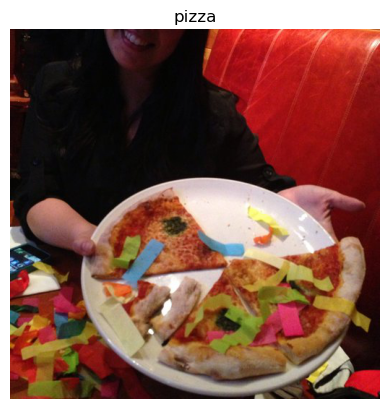

In [49]:
# View a random image from the training dataset
img = view_random_image(trg_dir= "pizza_steak/train/",
                  trg_class= "pizza")

In [50]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 53,   8,   5],
        [ 53,   9,   8],
        [ 51,  10,   8],
        ...,
        [171,  88,  38],
        [177,  94,  44],
        [180,  97,  47]],

       [[ 53,   8,   5],
        [ 53,   9,   8],
        [ 50,   9,   7],
        ...,
        [200, 109,  56],
        [191, 100,  47],
        [188,  97,  44]],

       [[ 62,  17,  14],
        [ 60,  16,  15],
        [ 57,  16,  14],
        ...,
        [255, 156, 100],
        [255, 161, 104],
        [255, 165, 108]],

       ...,

       [[115,  49,  15],
        [117,  53,  18],
        [118,  54,  18],
        ...,
        [ 48,   6,   8],
        [ 34,   0,   1],
        [ 28,   0,   1]],

       [[121,  55,  20],
        [124,  60,  22],
        [124,  60,  22],
        ...,
        [ 28,  10,  10],
        [ 23,   4,   6],
        [ 21,   2,   6]],

       [[116,  51,  13],
        [122,  58,  20],
        [123,  59,  21],
        ...,
        [ 17,  18,  1

In [52]:
img.shape # returns width, height, color channels

(512, 512, 3)

**Note**: Many machine learning model prefer to work between 0 and 1 values

In [53]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.20784314, 0.03137255, 0.01960784],
        [0.20784314, 0.03529412, 0.03137255],
        [0.2       , 0.03921569, 0.03137255],
        ...,
        [0.67058824, 0.34509804, 0.14901961],
        [0.69411765, 0.36862745, 0.17254902],
        [0.70588235, 0.38039216, 0.18431373]],

       [[0.20784314, 0.03137255, 0.01960784],
        [0.20784314, 0.03529412, 0.03137255],
        [0.19607843, 0.03529412, 0.02745098],
        ...,
        [0.78431373, 0.42745098, 0.21960784],
        [0.74901961, 0.39215686, 0.18431373],
        [0.7372549 , 0.38039216, 0.17254902]],

       [[0.24313725, 0.06666667, 0.05490196],
        [0.23529412, 0.0627451 , 0.05882353],
        [0.22352941, 0.0627451 , 0.05490196],
        ...,
        [1.        , 0.61176471, 0.39215686],
        [1.        , 0.63137255, 0.40784314],
        [1.        , 0.64705882, 0.42352941]],

       ...,

       [[0.45098039, 0.19215686, 0.05882353],
        [0.45882353, 0.20784314, 0.07058824],
        [0.4627451 , 0

## An end-to-example

Let's build a CNN to find patterns in our images.

* Load our images
* Preprocess our images
* Build a CNN
* Compile CNN
* Fit the CNN

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocessing data
train_datagen = ImageDataGenerator(rescale= 1/255.)
valid_datagen = ImageDataGenerator(rescale= 1/255.)
